In [ ]:
# Mount colab with mydrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#After executing the below command restart the kernel and run all cells.
!pip3 install scikit-learn --upgrade --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.7 MB 35.8 MB/s 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Module 1: Importing Data Sets



In [ ]:
house=pd.read_csv("/content/drive/MyDrive/IBM/kc_house_data_NaN.csv")

In [ ]:
house

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,263000018,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,21611,291310100,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
# We use the method head to display the first 5 columns of the dataframe.
house.head(5)


,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
house.tail()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,21608,263000018,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,21611,291310100,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,21612,1523300157,20141015T000000,325000.0,2.0,0.75,1020,1076,2.0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
# Question 1
# Display the data types of each column using the function dtypes, then take a screenshot and submit it, include your code in the image.

In [ ]:
house.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
# We use the method describe to obtain a statistical summary of the dataframe.

In [ ]:
# # Module 2: Data Wrangling
### Question 2 Drop the columns <code>"id"</code>  and <code>"Unnamed: 0"</code> from axis 1 using the method <code>drop()</code>, then use the method <code>describe()</code> to obtain a statistical summary of the data. Take a screenshot and submit it, make sure the <code>inplace</code> parameter is set to <code>True</code>

In [ ]:
house.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
# We can see we have missing values for the columns  bedrooms and  bathrooms 

In [ ]:
print("number of NaN values for the column bedrooms :", house['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", house['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [ ]:
# We can replace the missing values of the column 'bedrooms' with the mean of the column 'bedrooms'  using the method replace(). Don't forget to set the inplace parameter to True

In [ ]:
mean=house['bedrooms'].mean()
house['bedrooms'].replace(np.nan,mean, inplace=True)

In [ ]:
house.mean()

<ipython-input-23-7d855ff8877a>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  house.mean()


Unnamed: 0       1.080600e+04
id               4.580302e+09
price            5.400881e+05
bedrooms         3.372870e+00
bathrooms        2.115736e+00
sqft_living      2.079900e+03
sqft_lot         1.510697e+04
floors           1.494309e+00
waterfront       7.541757e-03
view             2.343034e-01
condition        3.409430e+00
grade            7.656873e+00
sqft_above       1.788391e+03
sqft_basement    2.915090e+02
yr_built         1.971005e+03
yr_renovated     8.440226e+01
zipcode          9.807794e+04
lat              4.756005e+01
long            -1.222139e+02
sqft_living15    1.986552e+03
sqft_lot15       1.276846e+04
dtype: float64

In [ ]:
house.std()

<ipython-input-24-52ac846a9e07>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  house.std()


Unnamed: 0       6.239280e+03
id               2.876566e+09
price            3.671272e+05
bedrooms         9.263780e-01
bathrooms        7.689959e-01
sqft_living      9.184409e+02
sqft_lot         4.142051e+04
floors           5.399889e-01
waterfront       8.651720e-02
view             7.663176e-01
condition        6.507430e-01
grade            1.175459e+00
sqft_above       8.280910e+02
sqft_basement    4.425750e+02
yr_built         2.937341e+01
yr_renovated     4.016792e+02
zipcode          5.350503e+01
lat              1.385637e-01
long             1.408283e-01
sqft_living15    6.853913e+02
sqft_lot15       2.730418e+04
dtype: float64

In [ ]:
# We also replace the missing values of the column 'bathrooms' with the mean of the column 'bathrooms'  using the method replace(). Don't forget to set the  inplace  parameter top  True 

In [ ]:
mean=house['bathrooms'].mean()
house['bathrooms'].replace(np.nan,mean, inplace=True)

In [ ]:
print("number of NaN values for the column bedrooms :", house['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", house['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


In [ ]:
# Module 3: Exploratory Data Analysis

In [ ]:
### Question 3
# Use the method <code>value_counts</code> to count the number of houses with unique floor values, use the method <code>.to_frame()</code> to convert it to a dataframe.

In [ ]:
house['floors'].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

In [ ]:
## Question 4

In [ ]:
## Use the function <code>boxplot</code> in the seaborn library  to  determine whether houses with a waterfront view or without a waterfront view have more price outliers.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

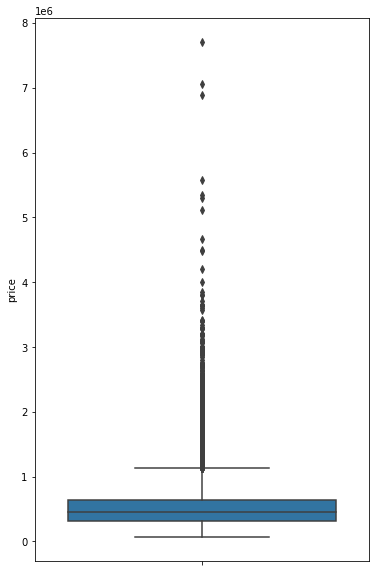

In [ ]:
plt.figure(figsize = (6,10)) 
sns.boxplot(y='price', data=house)
plt.show()

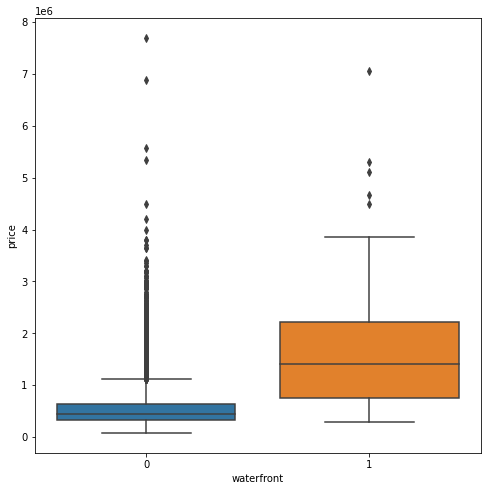

In [ ]:
plt.figure(figsize = (8,8))
sns.boxplot(x='waterfront', y='price', data=house)
plt.show()

In [ ]:
### Question 5

In [ ]:
### Use the function <code>regplot</code>  in the seaborn library  to  determine if the feature <code>sqft_above</code> is negatively or positively correlated with price.


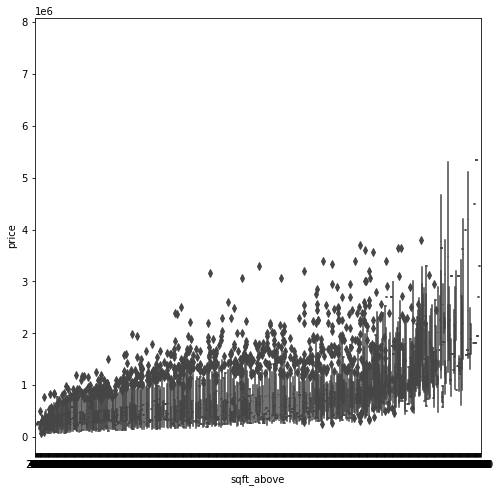

In [ ]:
plt.figure(figsize = (8,8))
sns.boxplot(x='sqft_above', y='price', data=house)
plt.show()

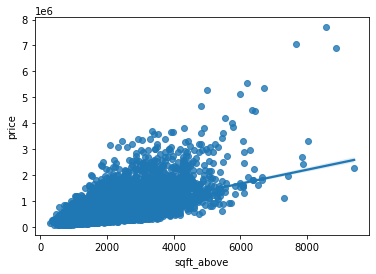

In [ ]:
sns.regplot(x = "sqft_above", 
            y = "price", 
            data = house)

In [ ]:
#.  We can use the Pandas method corr() to find the feature other than price that is most correlated with price.

In [ ]:
house.corr()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
Unnamed: 0,1.000000,0.006718,0.027372,0.010306,0.106989,0.044717,-0.026877,0.179138,-0.007611,-0.013751,...,0.082050,0.071958,-0.041841,0.199549,-0.025601,-0.002199,0.000701,0.008649,0.026647,-0.029827
id,0.006718,1.000000,-0.016762,0.001331,0.005233,-0.012258,-0.132109,0.018525,-0.002721,0.011592,...,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,0.027372,-0.016762,1.000000,0.308797,0.525738,0.702035,0.089661,0.256794,0.266369,0.397293,...,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.010306,0.001331,0.308797,1.000000,0.514194,0.578077,0.032307,0.178022,-0.006800,0.080058,...,0.356589,0.479286,0.302856,0.155749,0.018456,-0.153736,-0.009735,0.130978,0.393356,0.030430
bathrooms,0.106989,0.005233,0.525738,0.514194,1.000000,0.755371,0.087929,0.502132,0.063744,0.188341,...,0.664676,0.686309,0.283428,0.506913,0.050560,-0.204819,0.024246,0.224922,0.569467,0.087539
sqft_living,0.044717,-0.012258,0.702035,0.578077,0.755371,1.000000,0.172826,0.353949,0.103818,0.284611,...,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.026877,-0.132109,0.089661,0.032307,0.087929,0.172826,1.000000,-0.005201,0.021604,0.074710,...,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.179138,0.018525,0.256794,0.178022,0.502132,0.353949,-0.005201,1.000000,0.023698,0.029444,...,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.007611,-0.002721,0.266369,-0.006800,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,...,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,-0.013751,0.011592,0.397293,0.080058,0.188341,0.284611,0.074710,0.029444,0.401857,1.000000,...,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575


In [ ]:
house.corr()['price'].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
Unnamed: 0       0.027372
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

In [ ]:
#. Module 4: Model Development¶
# We can Fit a linear regression model using the  longitude feature <code>'long'</code> and  caculate the R^2.


In [ ]:
X = house[['long']]
Y = house['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

In [ ]:
### Question  6

In [ ]:
# Fit a linear regression model to predict the <code>'price'</code> using the feature <code>'sqft_living'</code> then calculate the R^2. Take a screenshot of your code and the value of the R^2.

In [ ]:
X = house[['sqft_living']]
Y = house['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.4928532179037931

In [ ]:
### Question 7

In [ ]:
# Fit a linear regression model to predict the <code>'price'</code> using the list of features:


In [ ]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     

In [ ]:
# Then calculate the R^2. Take a screenshot of your code.

In [ ]:
### This will help with Question 8

#Create a list of tuples, the first element in the tuple contains the name of the estimator:<code>'scale'</code> <code>'polynomial'</code>

#<code>'model'</code>

# The second element in the tuple  contains the model constructor <code>StandardScaler()</code>

# <code>PolynomialFeatures(include_bias=False)</code>

# <code>LinearRegression()</code>


In [ ]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [ ]:
### Question 8

# Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list <code>features</code>, and calculate the R^2.
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [ ]:
# Module 5: Model Evaluation and Refinement
# Import the necessary modules:

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("grade")


grade


In [ ]:
# We will split the data into training and testing sets:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
house 

['floors',
 'waterfront',
 'lat',
 'bedrooms',
 'sqft_basement',
 'view',
 'bathrooms',
 'sqft_living15',
 'sqft_above',
 'grade',
 'sqft_living']

In [ ]:
house=pd.read_csv("/content/drive/MyDrive/IBM/kc_house_data_NaN.csv")

In [ ]:
x = house.iloc[: , :-1]
y = house.iloc[: , :1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=0)

In [ ]:
features = ["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X =  house[features]
Y =  house['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [ ]:
### Question 9

In [ ]:
# Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.


In [ ]:
from sklearn.linear_model import Ridge
RigeModel = Ridge(alpha=0.1) 
RigeModel.fit(x_train, y_train)
RigeModel.score(x_test, y_test)

In [ ]:
### Question 10
# Perform a second order polynomial transform on both the training data and testing data. 
#Create and fit a Ridge regression object using the training data,
# set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2.


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pr=PolynomialFeatures(degree=2)
pr


PolynomialFeatures()

In [ ]:
PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

PolynomialFeatures()